Team id: 3<br>
Div - C<br>
Semester - 5th<br>
School Of Computer Science and Engineering

**5DMACP06 Richter's Predictor Modelling Earthquake**

Problem Statement :-
Based on aspects of building location and construction, the goal is to predict the level of damage to buildings
caused by the 2015 Gorkha earthquake in Nepal.

Team Leader:<br>
Nitin Verma     Roll No: 148, USN: 01FE17BCS125

Team Members:<br>
Puneet Gupta    Roll No: 166, USN: 01FE17BCS144<br>
Rahetul Asquin  Roll No: 170, USN: 01FE17BCS148<br>
Ritbik Bharti   Roll No: 179, USN: 01FE17BCS158<br>

In [1]:
#Importing necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings                     #to remove warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
train_values = pd.read_csv('Data/train_values.csv', index_col='building_id')
train_labels = pd.read_csv('Data/train_labels.csv', index_col='building_id')
test_values = pd.read_csv('Data/test_values.csv', index_col='building_id')

**Normalising the Age attribute**
- Some age was around 1000, which we replaced with 200 the next highest value
- All age values is normalised to fit a smaller range


In [ ]:
#Normalising the Age attribute

age = train_values['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
train_values.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
train_values['age'] = age.T

** Normalising the count_floor_pre_eq attribute **
- As analysed there is less number of floors gretaer than 5, so we replaced higher floors with 5
- All values is then normalised to fit a smaller range

In [ ]:
train_values['count_floors_pre_eq'].value_counts()

In [ ]:
floors = train_values['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
train_values.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
train_values['count_floors_pre_eq'] = floors.T

** Normalising the area_percentage attribute **
- Min is 1 and max is 100, thats a big difference in percentages
- Hence, we normalised them to fit smaller range

In [ ]:
ap = train_values['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
train_values.drop(['area_percentage'], axis = 1, inplace = True)
train_values['area_percentage'] = ap.T

** Normalising the height_percentage attribute **
- Max is 32 and mean is 5, hence large deviation of max value
- Hence, we normalised them to fit in smaller range

In [ ]:
hp = train_values['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
train_values.drop(['height_percentage'], axis = 1, inplace = True)
train_values['height_percentage'] = hp.T

** Replacing the count_families values **
- Very few families have count > 4
- Hence, we replaced greater counts with 4

In [ ]:
train_values['count_families'].value_counts()

In [ ]:
cf = train_values['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
train_values.drop(['count_families'], axis = 1, inplace = True)
train_values['count_families'] = np.array(cf_new).T

** Normalising and doing the same above steps for the test data **

In [ ]:
age = test_values['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]list()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
test_values.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
test_values['count_floors_pre_eq'] = floors.T
test_values.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
test_values['age'] = age.T

In [ ]:
floors = test_values['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
test_values.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
test_values['count_floors_pre_eq'] = floors.T

In [ ]:
ap = test_values['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
test_values.drop(['area_percentage'], axis = 1, inplace = True)
test_values['area_percentage'] = ap.T

In [ ]:
hp = test_values['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
test_values.drop(['height_percentage'], axis = 1, inplace = True)
test_values['height_percentage'] = hp.T

In [ ]:
cf = test_values['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
test_values.drop(['count_families'], axis = 1, inplace = True)
test_values['count_families'] = np.array(cf_new).T

** One hot encoding **
- All categorical vaiables of training and test data is encoded to numerical types

In [ ]:
train_values = pd.get_dummies(train_values)
test_values = pd.get_dummies(test_values)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, train_size=0.2)

In [7]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [8]:
# Importing the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Creating the model and fitting training data to it

model = RandomForestClassifier(n_estimators=150)
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

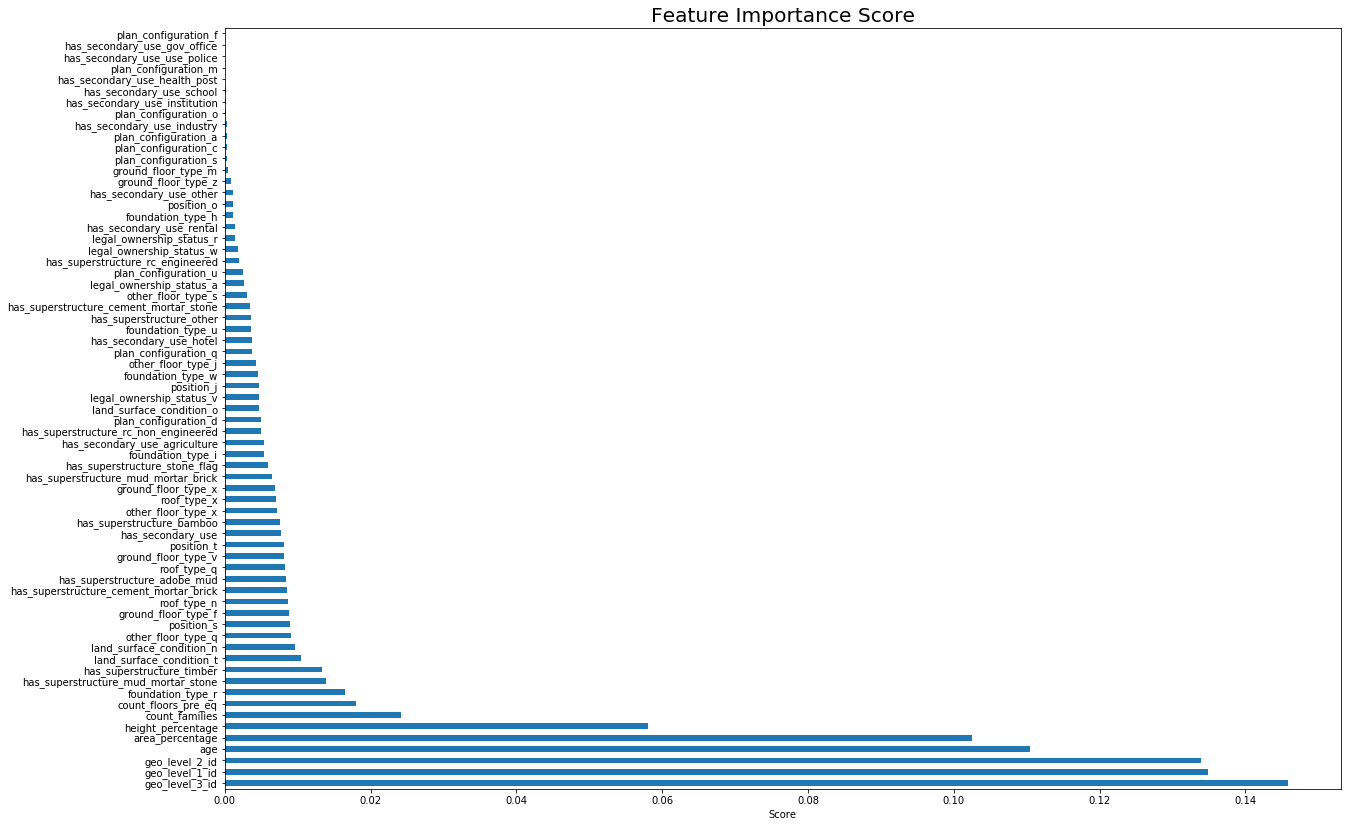

In [10]:
# Horizontal bar chart for feature Importance
feat_importances = pd.Series(model.feature_importances_,index= X_train.columns)
feat_importances = feat_importances.nlargest(67)
plt.figure(figsize=(20,14))
feat_importances.plot(kind='barh')
plt.style.use('fivethirtyeight')
plt.xlabel('Score')
plt.title('Feature Importance Score')
plt.show()

** Selection of important features **
- feat_importances returns a list of impotant features
- subset of training and testing data is created with those important features

In [ ]:
import_features = list(feat_importances.index)

train_values_subset = X_train[import_features]
test_values_subset = test_values[import_features]


In [11]:
import_features = list(feat_importances.index)
trainx_values_subset = X_train[import_features]
trainy_values_subset = y_train[import_features]
testx_values_subset = X_test[import_features]
testy_values_subset = y_test[import_features]


KeyError: "None of [Index(['geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',\n       'area_percentage', 'height_percentage', 'count_families',\n       'count_floors_pre_eq', 'foundation_type_r',\n       'has_superstructure_mud_mortar_stone', 'has_superstructure_timber',\n       'land_surface_condition_t', 'land_surface_condition_n',\n       'other_floor_type_q', 'position_s', 'ground_floor_type_f',\n       'roof_type_n', 'has_superstructure_cement_mortar_brick',\n       'has_superstructure_adobe_mud', 'roof_type_q', 'ground_floor_type_v',\n       'position_t', 'has_secondary_use', 'has_superstructure_bamboo',\n       'other_floor_type_x', 'roof_type_x', 'ground_floor_type_x',\n       'has_superstructure_mud_mortar_brick', 'has_superstructure_stone_flag',\n       'foundation_type_i', 'has_secondary_use_agriculture',\n       'has_superstructure_rc_non_engineered', 'plan_configuration_d',\n       'land_surface_condition_o', 'legal_ownership_status_v', 'position_j',\n       'foundation_type_w', 'other_floor_type_j', 'plan_configuration_q',\n       'has_secondary_use_hotel', 'foundation_type_u',\n       'has_superstructure_other', 'has_superstructure_cement_mortar_stone',\n       'other_floor_type_s', 'legal_ownership_status_a',\n       'plan_configuration_u', 'has_superstructure_rc_engineered',\n       'legal_ownership_status_w', 'legal_ownership_status_r',\n       'has_secondary_use_rental', 'foundation_type_h', 'position_o',\n       'has_secondary_use_other', 'ground_floor_type_z', 'ground_floor_type_m',\n       'plan_configuration_s', 'plan_configuration_c', 'plan_configuration_a',\n       'has_secondary_use_industry', 'plan_configuration_o',\n       'has_secondary_use_institution', 'has_secondary_use_school',\n       'has_secondary_use_health_post', 'plan_configuration_m',\n       'has_secondary_use_use_police', 'has_secondary_use_gov_office',\n       'plan_configuration_f'],\n      dtype='object')] are in the [columns]"

In [ ]:
test_val=X_test=[import_features]

In [ ]:
# Again model is fit with new subset of training data

model.fit(train_values_subset,  y_train.values.ravel())

In [ ]:
from sklearn.metrics import f1_score

in_sample_preds = model.predict(test_val)
f1_score( y_test, in_sample_preds, average='micro')

In [ ]:
y_test.head()

In [ ]:
#make predictions
predictions = model.predict( test_values_subset)

In [ ]:
#Read submission format

submission_format = pd.read_csv('Data/submission_format.csv', index_col='building_id')

In [ ]:
#Creating the dataframe of submission based on given format

my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

In [ ]:
#Saving the output to .csv file

my_submission.to_csv('submission_15.csv')

In [ ]:
!head "submission_15.csv"